___

<a href='http://www.pieriandata.com'> <img src='../../Pierian_Data_Logo.png' /></a>
___

# SF Salaries Exercise 

Welcome to a quick exercise for you to practice your pandas skills! We will be using the [SF Salaries Dataset](https://www.kaggle.com/kaggle/sf-salaries) from Kaggle! Just follow along and complete the tasks outlined in bold below. The tasks will get harder and harder as you go along.

** Import pandas as pd.**

In [186]:
import pandas as pd
import numpy as np

** Read Salaries.csv as a dataframe called sal.**

In [32]:
df = pd.read_csv("/content/Salaries(exercise).csv")

** Check the head of the DataFrame. **

In [42]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


**What is the average BasePay ?**

In [6]:
df["BasePay"].mean()

66325.4488404877

** What is the highest amount of OvertimePay in the dataset ? **

In [7]:
df["OvertimePay"].max()

245131.88

** What is the job title of  JOSEPH DRISCOLL ? Note: Use all caps, otherwise you may get an answer that doesn't match up (there is also a lowercase Joseph Driscoll). **

In [40]:
df["JobTitle"][df["EmployeeName"] =="JOSEPH DRISCOLL"]

24    CAPTAIN, FIRE SUPPRESSION
Name: JobTitle, dtype: object

** How much does JOSEPH DRISCOLL make (including benefits)? **

In [58]:
df["TotalPayBenefits"][df["EmployeeName"] =="JOSEPH DRISCOLL"]

24    270324.91
Name: TotalPayBenefits, dtype: float64

** What is the name of highest paid person (including benefits)?**

In [59]:
df[df["TotalPayBenefits"]==df["TotalPayBenefits"].max()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


** What is the name of lowest paid person (including benefits)? Do you notice something strange about how much he or she is paid?**

In [60]:
df[df["TotalPayBenefits"]==df["TotalPayBenefits"].min()]

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


** What was the average (mean) BasePay of all employees per year? (2011-2014) ? **

In [65]:
df.groupby(["Year"]).mean()["BasePay"]

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

** How many unique job titles are there? **

Read about the "nunique" function

In [67]:
df["JobTitle"].nunique()

2159

** What are the top 5 most common jobs? **

In [74]:
df["JobTitle"].value_counts()[0:5]

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

** How many Job Titles were represented by only one person in 2013? (e.g. Job Titles with only one occurence in 2013?) **

In [216]:
list_true = df["JobTitle"][df["Year"]==2013].value_counts()==1
len(np.where(list_true)[0])

202

** How many people have the word Chief 

---

in their job title? (This is pretty tricky) **

In [176]:
Chief_in_Job = df[df["JobTitle"].str.contains("Chief", case=False)].shape[0]
Chief_in_Job

627

In [ ]:
# ans is 627

 Is there a correlation between length of the Job Title string and Salary? **

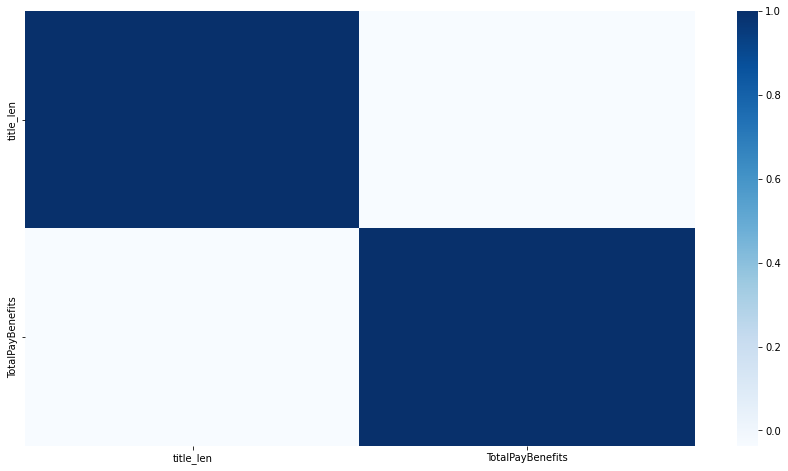

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

df["title_len"] = df["JobTitle"].str.len()
sub_df = pd.DataFrame(df, columns=["title_len", "TotalPayBenefits"])
corr  = sub_df.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,  cmap="Blues");

In [174]:
corr

,title_len,TotalPayBenefits
title_len,1.000000,-0.036878
TotalPayBenefits,-0.036878,1.000000


# Great Job!